---
---
# **TABLE OF CONTENTS**
---

1. INTRODUCTION
2. IMPORTING LIBRARIES
3. LOADING THE DATA
4. DATA EXPLORATION AND ANALYSIS
5. DATA PREPARATION
6. VISUALIZING CLASS DISTRIBUTION
7. HANDLING IMBALANCED DATA
8. BUILDING AND TRAINING NEURAL NETWORK MODEL
9. FURTHER ANALYSIS AND VISUALIZATION :
  - VISUALIZE TRAINING ERROR AND TESTING ERROR (LOSS)
  - VISUALIZE TRAINING AND TESTING ACCURACY
  - MAKING PREDICTIONS WITH THE MODEL
  - CALCULATING CORRECT PREDICTIONS
10. MODEL IMPROVEMENTS :
  - IMPLEMENTING DROPOUT & EARLY STOPPING
---
---

# INTRODUCTION

- The Credit Card Fraud Detection dataset is a collection of information about credit card transactions made by people in Europe during two days in September 2013.
- Among these transactions, only a very small portion (about 0.17%) are identified as fraudulent.
- The data includes details like the time of the transaction, the amount spent, and a special value that indicates whether the transaction was a fraud or not.
- This dataset helps researchers and analysts develop tools to automatically spot these rare fraudulent transactions among the many legitimate ones.

In [ ]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# To load dataset of credit card
df = pd.read_csv("/content/drive/MyDrive/DATASETS/creditcard.csv")

# To show any 10 records
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54588,46517.0,1.234667,-0.270121,0.248155,-1.410628,-0.637170,-0.961285,-0.083658,-0.154179,1.150174,...,-0.246824,-0.627626,0.140869,0.087682,0.183450,-0.237445,0.017714,0.021259,23.99,0
9468,14017.0,1.283687,-0.056278,0.557980,0.001613,-0.415451,-0.112040,-0.572142,0.058243,1.632161,...,-0.360958,-0.884881,0.067005,-0.555829,0.030626,0.787951,-0.100626,-0.012908,3.01,0
16062,27489.0,-1.157075,-0.441636,1.969423,-1.732715,-0.289727,1.961201,0.215098,0.676798,0.991825,...,0.527219,1.396624,0.125841,-1.488108,0.235672,-0.363051,0.142090,0.085083,200.00,0
279102,168652.0,1.850508,-0.369274,-2.160689,0.199894,0.481252,-0.143101,-0.032928,0.077159,0.998156,...,-0.207456,-0.666664,0.073227,-0.132296,-0.085500,-0.101783,-0.037551,-0.015817,98.92,0
111941,72442.0,1.212385,0.410698,-0.138586,1.191509,0.177675,-0.711632,0.453180,-0.184915,-0.266431,...,0.028941,0.125921,-0.114744,0.066848,0.751449,-0.249477,0.002061,0.007914,10.22,0
119788,75583.0,-0.679025,0.106895,0.681254,-2.728532,-0.898940,-0.326776,-0.609153,0.466221,-2.465394,...,-0.097756,-0.036028,-0.121573,-0.546321,-0.225612,-0.386087,0.131597,0.118842,10.00,0
10083,15306.0,-0.245059,1.013303,1.841710,0.775436,0.303747,-0.600958,0.919650,-0.354093,0.802222,...,-0.033219,0.351046,-0.157336,0.552293,0.063085,-0.439455,-0.136360,-0.200540,12.95,0
80560,58541.0,-0.500051,1.244892,0.822188,-0.186156,0.317107,-0.525274,0.653694,0.025774,-0.050451,...,-0.357584,-0.918269,-0.102471,-0.528248,-0.019744,0.130759,0.348413,0.146823,5.38,0
243067,151776.0,-0.555364,-0.283564,0.286097,-0.067550,1.021640,0.558272,-0.659173,0.218302,0.886975,...,0.245394,0.958417,-0.303724,-0.299115,-0.797133,-0.192460,-0.123182,0.204493,9.99,0
278091,168034.0,2.071322,-0.022119,-1.117438,0.377864,-0.030052,-1.117799,0.215350,-0.353105,0.478777,...,-0.292900,-0.687376,0.315422,-0.097169,-0.262765,0.203378,-0.067954,-0.060245,2.69,0


In [ ]:
# To check number of rows and columns
df.shape

(284807, 31)

In [ ]:
# To check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Check datatypes for better understanding
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# To check number of categories of Class column
df['Class'].unique()

array([0, 1])

In [ ]:
# Select input and output
X = df.drop('Class', axis = 1)
Y = df['Class']

In [ ]:
# Splitting data into 70% and 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
# Separate Fraud and Legitimate transactions
legitimate = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Calculate percentages
total_transactions = len(df)
legitimate_percentage = (len(legitimate) / total_transactions) * 100
fraud_percentage = (len(fraud) / total_transactions) * 100

print("Percentage of Legitimate Transactions : ", legitimate_percentage)
print("Percentage of Fraud Transactions : ", fraud_percentage)

Percentage of Legitimate Transactions :  99.82725143693798
Percentage of Fraud Transactions :  0.1727485630620034


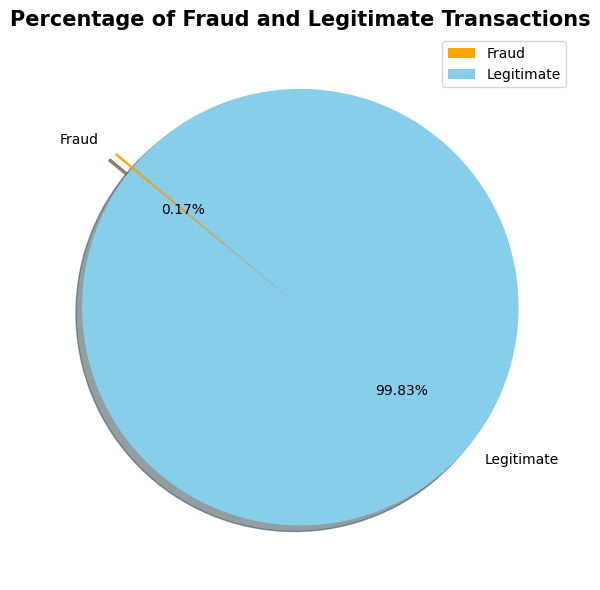

In [ ]:
# Create a pie chart to visualise the Fraud & Legitimate Transactions
labels = ['Fraud', 'Legitimate']
sizes = [fraud_percentage, legitimate_percentage]

# Visualise
plt.figure(figsize = (10, 6))
plt.pie(sizes, labels = labels, colors = ['orange', 'skyblue'], autopct = '%.2f%%', explode = [0.1, 0], shadow = True, startangle = 140)
plt.title("Percentage of Fraud and Legitimate Transactions", fontsize = 15, fontweight = 600)
plt.legend()
plt.tight_layout()
plt.show()

- It shows 99.83% of transactions are Legitimate and 0.17% are Fraud.
- There are far more Legitimate transactions than Fraudulent transactions.

### Here, it shows that the data is highly Imbalanced means there's a huge difference between 0 and 1.

In [ ]:
# Data is Imbalanced, so use Sampling Technique means to balance the data (Random Over Sampler)
# Create object of RandomOverSampling class
ros = RandomOverSampler()

In [ ]:
# Apply RandomOverSampler on 70% Training data
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)

In [ ]:
#Check sample of output
# Check balance before Sampling when it not balanced
Y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [ ]:
# After balancing the data
Y_train_ros.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [ ]:
# Apply RandomOverSampler on 30% Testing data
X_test_ros, Y_test_ros = ros.fit_resample(X_test, Y_test)

In [ ]:
# Check balance before Sampling when it not balanced
Y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [ ]:
# After balancing the data
Y_test_ros.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [ ]:
# Apply Standard Scaling  on 70% input Training data and 30% input Testing data
ss = StandardScaler()

X_train_ros = ss.fit_transform(X_train_ros) 
X_test_ros = ss.transform(X_test_ros)

# Neural Network Model

In [ ]:
# Create a Neural Network means Fully Connected Network
# Build the model

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = (X.shape[1], )),          #Hidden Layer 1
        tf.keras.layers.Dense(units = 32, activation = 'relu'),          #Hidden Layer 2
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid')         # Output Layer
])

In [ ]:
# Compile the model (process the input)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the model with 70% Training data and 30% Training data

trained_model = model.fit(X_train_ros, Y_train_ros, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
9951/9951 [==============================] - 29s 3ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 2/100
9951/9951 [==============================] - 57s 6ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/100
9951/9951 [==============================] - 26s 3ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 7.2832e-04 - val_accuracy: 1.0000
Epoch 4/100
9951/9951 [==============================] - 25s 2ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 4.1426e-04 - val_accuracy: 1.0000
Epoch 5/100
9951/9951 [==============================] - 26s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 9.6376e-04 - val_accuracy: 1.0000
Epoch 6/100
9951/9951 [==============================] - 29s 3ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 3.1468e-04 - val_accuracy: 1.0000
Epoch 7/100
9951/9951 [==============================] - 25s 3ms/step - loss: 0.0018 - accuracy: 0.9995 - va

In [ ]:
# Check Evaluation of Testing

test_loss, test_accuracy = model.evaluate(X_test_ros, Y_test_ros)
print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_accuracy)

5332/5332 [==============================] - 9s 2ms/step - loss: 12.9349 - accuracy: 0.8593
Test Loss :  12.934946060180664
Test Accuracy :  0.8593097925186157


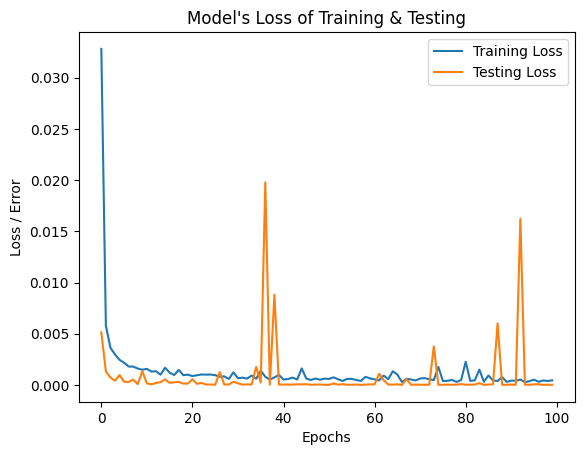

In [ ]:
# Visualise Training Error (loss) and Testing Error (loss)

plt.plot(trained_model.history['loss'], label = 'Training Loss')
plt.plot(trained_model.history['val_loss'], label = 'Testing Loss')
plt.title("Model's Loss of Training & Testing")
plt.xlabel("Epochs")
plt.ylabel("Loss / Error")
plt.legend()
plt.show()

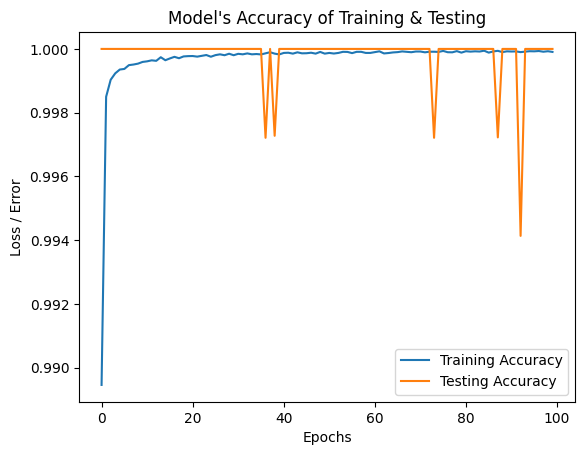

In [ ]:
# Visualise Training Accuracy and Testing Accuracy

plt.plot(trained_model.history['accuracy'], label = 'Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'Testing Accuracy')
plt.title("Model's Accuracy of Training & Testing")
plt.xlabel("Epochs")
plt.ylabel("Loss / Error")
plt.legend()
plt.show()

In [ ]:
# Predict the model

Y_pred = model.predict(X_test_ros)
Y_pred = np.where(Y_pred >= 0.5, 1, 0)

5332/5332 [==============================] - 7s 1ms/step


In [ ]:
# Model Evaluation
print(classification_report(Y_test_ros, Y_pred, target_names = ['Legitimate', 'Fraud']))

              precision    recall  f1-score   support

  Legitimate       0.78      1.00      0.88     85308
       Fraud       1.00      0.72      0.84     85308

    accuracy                           0.86    170616
   macro avg       0.89      0.86      0.86    170616
weighted avg       0.89      0.86      0.86    170616



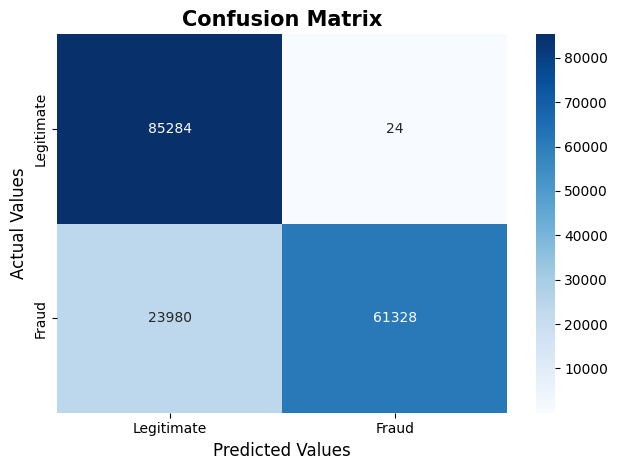

In [ ]:
# Visualisation of Confusion Matrix of Neural Network Model
class_labels = ['Legitimate', 'Fraud']

conf_matrix = confusion_matrix(Y_test_ros, Y_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)        #fmt = 'd' : integer
plt.title("Confusion Matrix", fontsize = 15, fontweight = 600)
plt.ylabel("Actual Values", fontsize = 12)
plt.xlabel("Predicted Values", fontsize = 12)
plt.tight_layout()
plt.show()

---
It shows how well the model was able to predict whether transactions were Fraudulent or Legitimate.

- There were 85284 True Negatives, 24 False Positives, 23980 False Negatives, 61328 True Positives
- It shows 85284 transactions were Legitimate and 61328 transactions were Fraudulent
- The model incorrectly predicted that 24 transactions were Fraudulent and 23980 transactions were Legitimate
---

In [ ]:
# Calculate the number of correct predictions
correct_predictions = sum(1 for actual, pred in zip(Y_test_ros, Y_pred) if actual == pred)

# Calculate the total number of predictions
total_predictions = len(Y_test_ros)

# Calculate the percentage of correct predictions
accuracy = (correct_predictions / total_predictions) * 100

print("Accuracy Percentage :", accuracy)

Accuracy Percentage : 85.9309795095419


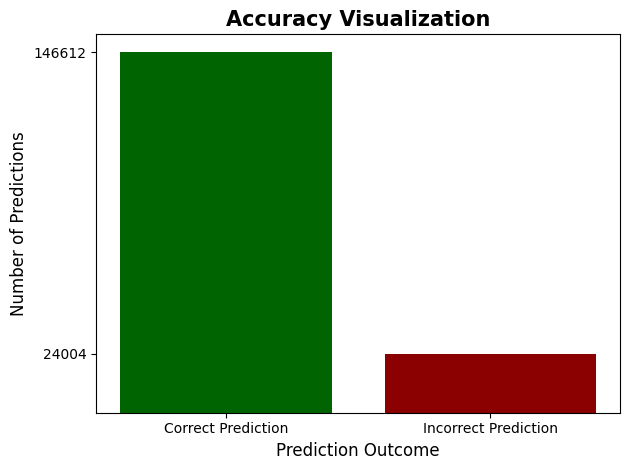

In [ ]:
# Visualise Correct & Incorrect Predictions
labels = ['Correct Prediction', 'Incorrect Prediction']
values = [correct_predictions, total_predictions - correct_predictions]

# Create a bar plot
plt.bar(labels, values, color = ['darkgreen', 'darkred'])
plt.title('Accuracy Visualization', fontsize = 15, fontweight = 600)
plt.xlabel('Prediction Outcome', fontsize = 12)
plt.ylabel('Number of Predictions', fontsize = 12)
plt.yticks(values)
plt.tight_layout()
plt.show()

---
It shows the Accuracy of Predictions for Fraudulent and Legitimate Transactions.
- The green line shows the number of Correct Predictions, and the red line shows the number of Incorrect Predictions.
- The Correct Predictions line is higher than the Incorrect Predictions line, which means that the model made more correct predictions than incorrect predictions.
---

# Dropout

In [ ]:
# Create a Neural Network means Fully Connected Network
# Build the model

model_drop = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (X.shape[1], )), Dropout(0.5),         #Hidden Layer 1
        tf.keras.layers.Dense(units = 64, activation = 'relu'), Dropout(0.3),          #Hidden Layer 2
        tf.keras.layers.Dense(units = 32, activation = 'relu'), Dropout(0.2),          #Hidden Layer 3
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid')         # Output Layer
])

In [ ]:
# Compile the model (process the input)

model_drop.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the model with 70% Training data and 30% Training data

trained_model_drop = model_drop.fit(X_train_ros, Y_train_ros, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
9951/9951 [==============================] - 69s 7ms/step - loss: 0.0611 - accuracy: 0.9793 - val_loss: 0.0192 - val_accuracy: 0.9945
Epoch 2/10
9951/9951 [==============================] - 35s 3ms/step - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3/10
9951/9951 [==============================] - 32s 3ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.0100 - val_accuracy: 0.9972
Epoch 4/10
9951/9951 [==============================] - 54s 5ms/step - loss: 0.0145 - accuracy: 0.9961 - val_loss: 0.0078 - val_accuracy: 0.9971
Epoch 5/10
9951/9951 [==============================] - 52s 5ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 6/10
9951/9951 [==============================] - 47s 5ms/step - loss: 0.0116 - accuracy: 0.9970 - val_loss: 0.0056 - val_accuracy: 0.9972
Epoch 7/10
9951/9951 [==============================] - 32s 3ms/step - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.0137 - val_ac

In [ ]:
# Check Evaluation

test_loss, test_accuracy = model_drop.evaluate(X_test_ros, Y_test_ros)
print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_accuracy)

5332/5332 [==============================] - 9s 2ms/step - loss: 2.7672 - accuracy: 0.9065
Test Loss :  2.7671542167663574
Test Accuracy :  0.9065445065498352


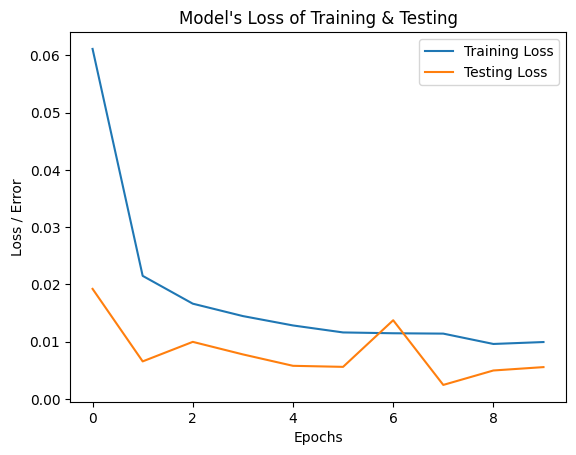

In [ ]:
# Visualise Training Error (loss) and Testing Error (loss)

plt.plot(trained_model_drop.history['loss'], label = 'Training Loss')
plt.plot(trained_model_drop.history['val_loss'], label = 'Testing Loss')
plt.title("Model's Loss of Training & Testing")
plt.xlabel("Epochs")
plt.ylabel("Loss / Error")
plt.legend()
plt.show()

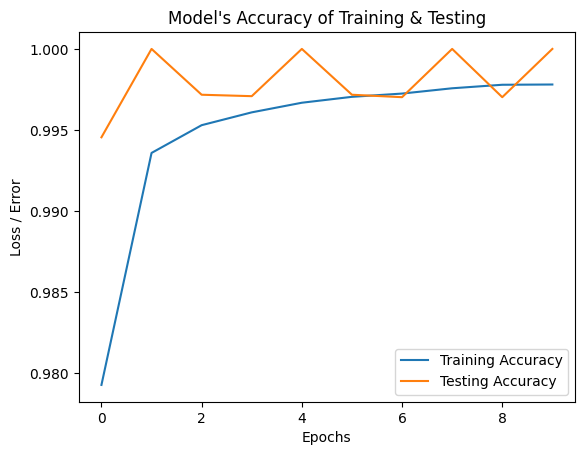

In [ ]:
# Visualise Training Accuracy and Testing Accuracy

plt.plot(trained_model_drop.history['accuracy'], label = 'Training Accuracy')
plt.plot(trained_model_drop.history['val_accuracy'], label = 'Testing Accuracy')
plt.title("Model's Accuracy of Training & Testing")
plt.xlabel("Epochs")
plt.ylabel("Loss / Error")
plt.legend()
plt.show()

In [ ]:
# Predict the model
Y_pred = model_drop.predict(X_test_ros)
Y_pred = np.where(Y_pred >= 0.5, 1, 0)

5332/5332 [==============================] - 9s 2ms/step


In [ ]:
# Model Evaluation

print(classification_report(Y_test_ros, Y_pred, target_names = ['Legitimate', 'Fraud']))

              precision    recall  f1-score   support

  Legitimate       0.84      1.00      0.91     85308
       Fraud       1.00      0.81      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616



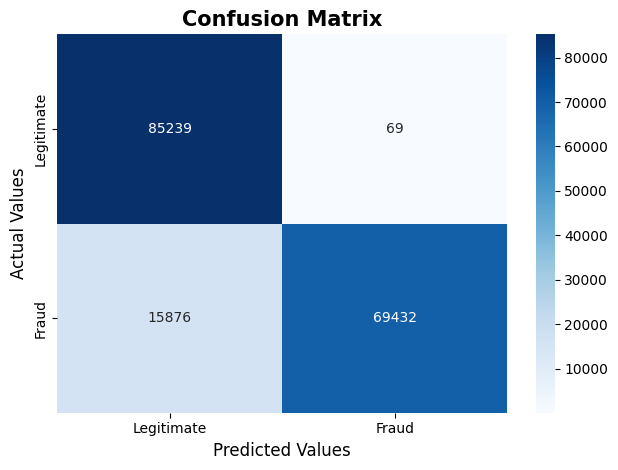

In [ ]:
# Visualisation of Confusion Matrix of Dropout Model
class_labels = ['Legitimate', 'Fraud']

conf_matrix_drop = confusion_matrix(Y_test_ros, Y_pred)
sns.heatmap(conf_matrix_drop, annot = True, cmap = 'Blues', fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)
plt.title("Confusion Matrix", fontsize = 15, fontweight = 600)
plt.ylabel("Actual Values", fontsize = 12)
plt.xlabel("Predicted Values", fontsize = 12)
plt.tight_layout()
plt.show()

---
It shows how well the model was able to predict whether transactions were Fraudulent or Legitimate.

- There were 85239 True Negatives, 69 False Positives, 15876 False Negatives, 69432 True Positives.
- The model was able to correctly predict that 85239 transactions were Legitimate and 69432 transactions were Fraudulent.
- The model also incorrectly predicted that 15876 transactions were Legitimate and 69 transactions were Fraudulent.
---

In [ ]:
# Calculate the number of correct predictions
correct_predictions = sum(1 for actual, pred in zip(Y_test_ros, Y_pred) if actual == pred)

# Calculate the total number of predictions
total_predictions = len(Y_test_ros)

# Calculate the percentage of correct predictions
accuracy = (correct_predictions / total_predictions) * 100

print("Accuracy Percentage :", accuracy)

Accuracy Percentage : 90.65445210296807


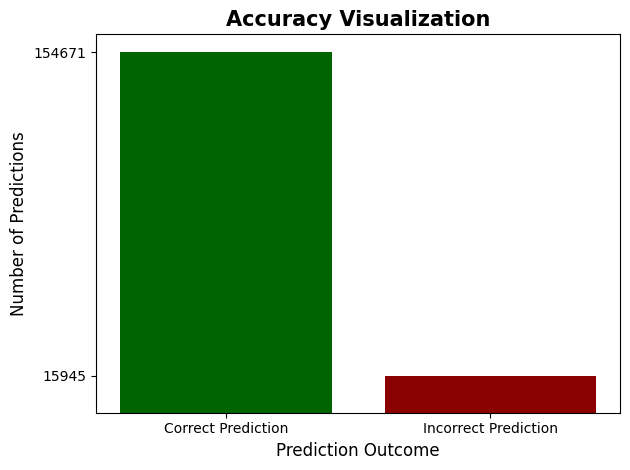

In [ ]:
# Visualise Correct & Incorrect Predictions
labels = ['Correct Prediction', 'Incorrect Prediction']
values = [correct_predictions, total_predictions - correct_predictions]

# Create a bar plot
plt.bar(labels, values, color = ['darkgreen', 'darkred'])
plt.title('Accuracy Visualization', fontsize = 15, fontweight = 600)
plt.xlabel('Prediction Outcome', fontsize = 12)
plt.ylabel('Number of Predictions', fontsize = 12)
plt.yticks(values)
plt.tight_layout()
plt.show()

---
It shows the Accuracy of Predictions for Fraudulent and Legitimate Transactions.
- The green line shows the number of correct predictions and the red line shows the number of incorrect predictions made by the model.
- The higher the green line, the more accurate the model's predictions and the lower the red line, the fewer incorrect predictions the model makes.
- The model was able to make accurate predictions for the majority of transactions.
---

# EarlyStopping

In [ ]:
# Create a Neural Network means Fully Connected Network
# Build the model

model_ES = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = (X.shape[1], )),         #Hidden Layer 1
        tf.keras.layers.Dense(units = 32, activation = 'relu'),           #Hidden Layer 2
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid')         # Output Layer
])

In [ ]:
# Compile the model (process the input)

model_ES.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Define an EarlyStopping callback to monitor validation loss
callback = tf.keras.callbacks.EarlyStopping(
           monitor = 'val_loss',   # Monitors validation loss
           min_delta = 0.001,      # Minimum change in loss to be considered improvement
           patience = 20,          # Number of epochs with no improvement before stopping
           verbose = 1             # Display messages about the stopping criteria
)

In [ ]:
#Train the model with 70% Training data and 30% Training data

trained_model_ES = model_ES.fit(X_train_ros, Y_train_ros, epochs = 2000, validation_split = 0.2, verbose = 1, callbacks = callback)

Epoch 1/2000
9951/9951 [==============================] - 27s 3ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2/2000
9951/9951 [==============================] - 26s 3ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3/2000
9951/9951 [==============================] - 24s 2ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 8.8723e-04 - val_accuracy: 1.0000
Epoch 4/2000
9951/9951 [==============================] - 28s 3ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/2000
9951/9951 [==============================] - 28s 3ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/2000
9951/9951 [==============================] - 27s 3ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 5.0361e-04 - val_accuracy: 1.0000
Epoch 7/2000
9951/9951 [==============================] - 25s 3ms/step - loss: 0.0019 - accuracy: 0.9995 - val

In [ ]:
# Check Evaluation

test_loss, test_accuracy = model_ES.evaluate(X_test_ros, Y_test_ros)
print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_accuracy)

5332/5332 [==============================] - 9s 2ms/step - loss: 4.9593 - accuracy: 0.8816
Test Loss :  4.9593281745910645
Test Accuracy :  0.8816465139389038


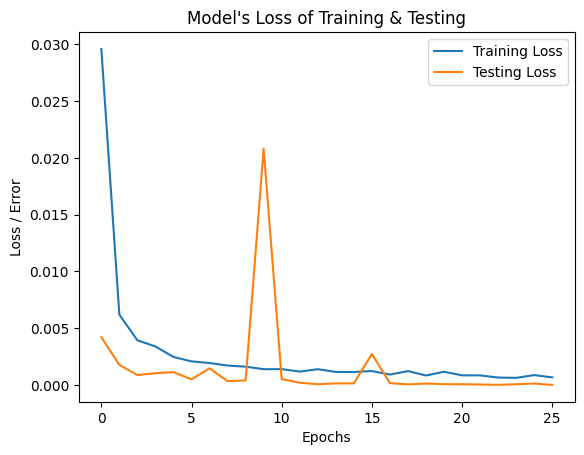

In [ ]:
# Visualise Training Error (loss) and Testing Error (loss)

plt.plot(trained_model_ES.history['loss'], label = 'Training Loss')
plt.plot(trained_model_ES.history['val_loss'], label = 'Testing Loss')
plt.title("Model's Loss of Training & Testing")
plt.xlabel("Epochs")
plt.ylabel("Loss / Error")
plt.legend()
plt.show()

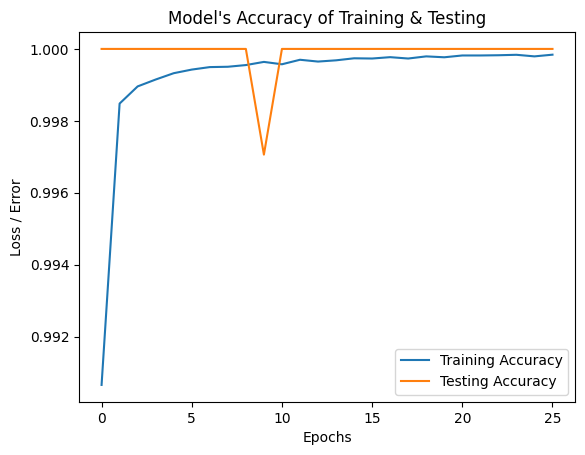

In [ ]:
# Visualise Training Accuracy and Testing Accuracy

plt.plot(trained_model_ES.history['accuracy'], label = 'Training Accuracy')
plt.plot(trained_model_ES.history['val_accuracy'], label = 'Testing Accuracy')
plt.title("Model's Accuracy of Training & Testing")
plt.xlabel("Epochs")
plt.ylabel("Loss / Error")
plt.legend()
plt.show()

In [ ]:
# Predict the model

Y_pred = model_ES.predict(X_test_ros)
Y_pred = np.where(Y_pred >= 0.5, 1, 0)

5332/5332 [==============================] - 9s 2ms/step


In [ ]:
# Model Evaluation

print(classification_report(Y_test_ros, Y_pred, target_names = ['Legitimate', 'Fraud']))

              precision    recall  f1-score   support

  Legitimate       0.81      1.00      0.89     85308
       Fraud       1.00      0.76      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616



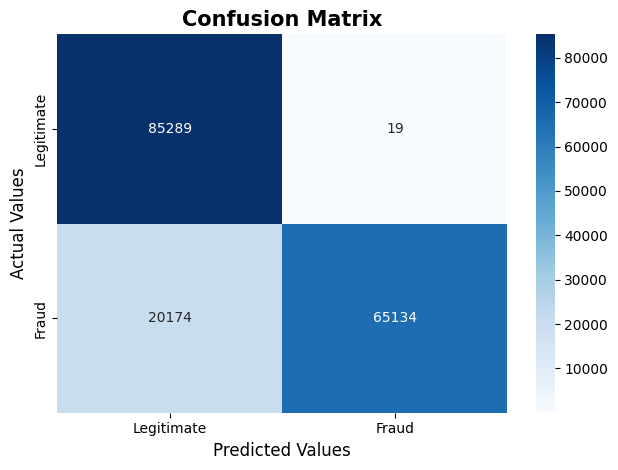

In [ ]:
# Visualisation of Confusion Matrix of EarlyStopping Model
class_labels = ['Legitimate', 'Fraud']

conf_matrix_ES = confusion_matrix(Y_test_ros, Y_pred)
sns.heatmap(conf_matrix_ES, annot = True, cmap = 'Blues', fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)
plt.title("Confusion Matrix", fontsize = 15, fontweight = 600)
plt.ylabel("Actual Values", fontsize = 12)
plt.xlabel("Predicted Values", fontsize = 12)
plt.tight_layout()
plt.show()

---
It shows how well the model was able to predict whether transactions were Fraudulent or Legitimate.

- There were 852389 True Negatives, 19 False Positives, 20174 False Negatives, 65134 True Positives.
- The model correctly predicted that 85289 transactions were Legitimate and 65134 transactions were fraudulent.
- It incorrectly predicted that 20174 transactions were Legitimate and 19 transactions were Fraudulent.
---

In [ ]:
# Calculate the number of correct predictions
correct_predictions = sum(1 for actual, pred in zip(Y_test_ros, Y_pred) if actual == pred)

# Calculate the total number of predictions
total_predictions = len(Y_test_ros)

# Calculate the percentage of correct predictions
accuracy = (correct_predictions / total_predictions) * 100

print("Accuracy Percentage :", accuracy)

Accuracy Percentage : 88.1646504431003


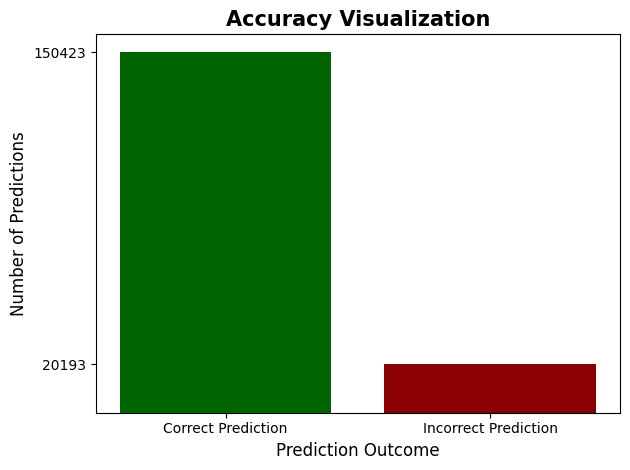

In [ ]:
# Visualise Correct & Incorrect Predictions
labels = ['Correct Prediction', 'Incorrect Prediction']
values = [correct_predictions, total_predictions - correct_predictions]

# Create a bar plot
plt.bar(labels, values, color = ['darkgreen', 'darkred'])
plt.title('Accuracy Visualization', fontsize = 15, fontweight = 600)
plt.xlabel('Prediction Outcome', fontsize = 12)
plt.ylabel('Number of Predictions', fontsize = 12)
plt.yticks(values)
plt.tight_layout()
plt.show()

---
It shows the Accuracy of Predictions for Fraudulent and Legitimate Transactions.
- The chart shows how many predictions were correct and incorrect.
- The green line represents the number of predictions that were Correct, while the red line represents the number of predictions that were Incorrect.
- It shows that the model was more accurate in predicting correct predictions than incorrect predictions.
---

---
# Summary 

- The dataset contains no null values, indicating complete data.
- A visualization of transaction types revealed that Legitimate transactions were 99.83%, while Fraudulent transactions were only 0.17%.
- The dataset suffers from an Imbalanced class distribution, which dealed with the Random Forest Classifier.
- A Neural Network model was constructed, achieving an accuracy of 85.93%.
- A Dropout technique was resulting in an improved accuracy of 90.65%.
- An EarlyStopping technique achieved an accuracy of 88.16%.

##### This summary outlines the data characteristics, data processing steps, and the results achieved with different models and techniques. It provides an overview of the accuracy achieved by each model.
---